In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../../data/"

figures_folder = "../../Figures/Group3/"

sif_output = "../../sif_files/Group3/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "gene_per_subgroup_correlation_sorted_melt.csv")

In [5]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group
top_n = 50  # Set the desired number of genes to display per group

top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

top_genes_per_group

/tmp/ipykernel_27208/189381725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


,Gene,Group,Correlation
0,ZFPM2,Group3,0.957692
1,FOXG1,Group3,0.947957
2,FSTL5,Group3,0.942308
3,PAPPA2,Group3,0.941538
4,IMPG2,Group3,0.941538
...,...,...,...
195,LRRC55,WNT,0.876923
196,SYT1,WNT,0.875385
197,SYT2,WNT,0.874615
198,PLXDC1,WNT,0.872308


In [6]:
group3_list = top_genes_per_group[top_genes_per_group["Group"] == "Group3"]["Gene"].reset_index(drop=True).to_list()

Selecting just Group 3 group

In [7]:
group3_list

['ZFPM2',
 'FOXG1',
 'FSTL5',
 'PAPPA2',
 'IMPG2',
 'OR2W3',
 'PTPRO',
 'TRIM58',
 'EYA2',
 'ANO2',
 'FAM174B',
 'RP11-127H5.1',
 'GUCY2D',
 'TAL2',
 'DOK6',
 'RD3',
 'PPP2R2B',
 'LDLRAD4',
 'KCNA5',
 'EYS',
 'SMARCD3',
 'AP000783.1',
 'LPPR5',
 'NPR3',
 'FCER2',
 'PROKR2',
 'FZD1',
 'ZFHX4',
 'DAB1',
 'SV2C',
 'TBR1',
 'FAM19A4',
 'GHR',
 'ARR3',
 'DCT',
 'NCKAP5',
 'SLITRK3',
 'CRX',
 'ZNF703',
 'LHX4',
 'LPPR4',
 'GRAMD1B',
 'TPRX2P',
 'C14orf23',
 'TSHZ3',
 'PLA2G4C',
 'KCNB2',
 'C2orf71',
 'C19orf77',
 'FAM89A']

# Creating a Network starting from All Omnipath interactions

In [8]:
group3_net = Network(group3_list, resources = omnipath)

Error: node PAPPA2 is not present in the resources database
Error: node OR2W3 is not present in the resources database
Error: node ANO2 is not present in the resources database
Error: node FAM174B is not present in the resources database
Error: node RP11-127H5.1 is not present in the resources database
Error: node RD3 is not present in the resources database
Error: node LDLRAD4 is not present in the resources database
Error: node EYS is not present in the resources database
Error: node AP000783.1 is not present in the resources database
Error: node LPPR5 is not present in the resources database
Error: node ZFHX4 is not present in the resources database
Error: node SV2C is not present in the resources database
Error: node ARR3 is not present in the resources database
Error: node NCKAP5 is not present in the resources database
Error: node ZNF703 is not present in the resources database
Error: node LPPR4 is not present in the resources database
Error: node GRAMD1B is not present in the re

Adding the node that were not found manually: GBRA5 --> GABRA5

In [9]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,ZFPM2,Q8WW38,NaN
1,FOXG1,P55316,NaN
2,FSTL5,Q8N475,NaN
3,IMPG2,Q9BZV3,NaN
4,PTPRO,Q16827,NaN
5,TRIM58,Q8NG06,NaN
6,EYA2,O00167,NaN
7,GUCY2D,Q02846,NaN
8,TAL2,Q16559,NaN
9,DOK6,Q6PKX4,NaN


In [10]:
group3_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=True, connect_with_bias=False, consensus=True)

In [11]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,ZFPM2,Q8WW38,NaN
1,FOXG1,P55316,NaN
2,FSTL5,Q8N475,NaN
3,IMPG2,Q9BZV3,NaN
4,PTPRO,Q16827,NaN
...,...,...,...
57,RHOA,P61586,NaN
58,JAK1,P23458,NaN
59,PPP2CA,P67775,NaN
60,COMPLEX:P19838_Q04206,COMPLEX:P19838_Q04206,NaN


In [12]:
group3_net.edges

,source,target,Type,Effect,References
0,P55316,Q12778,None,inhibition,HPRD:15084259;SPIKE:18391971;SPIKE_LC:18391971...
1,Q12778,P40763,None,inhibition,NetPath:19049975;SIGNOR:25510553; NetPath:1904...
2,P40763,P41221,None,stimulation,SPIKE:17203201;SPIKE:19424602;SPIKE_LC:1720320...
3,P41221,Q9UP38,None,stimulation,Baccin2019:10557084;CellTalkDB:10557084;Cellin...
4,Q00005,O15530,None,inhibition,SIGNOR:21075311; SIGNOR:21075311
...,...,...,...,...,...
123,P23458,P29597,None,stimulation,HPRD-phos:19901323;HPRD-phos:8702790;HPRD:7589...
124,O60674,P23458,None,stimulation,Macrophage:7504784
125,P23458,O60674,None,stimulation,Macrophage:7504784
126,P67775,COMPLEX:P19838_Q04206,None,inhibition,SIGNOR:11591705


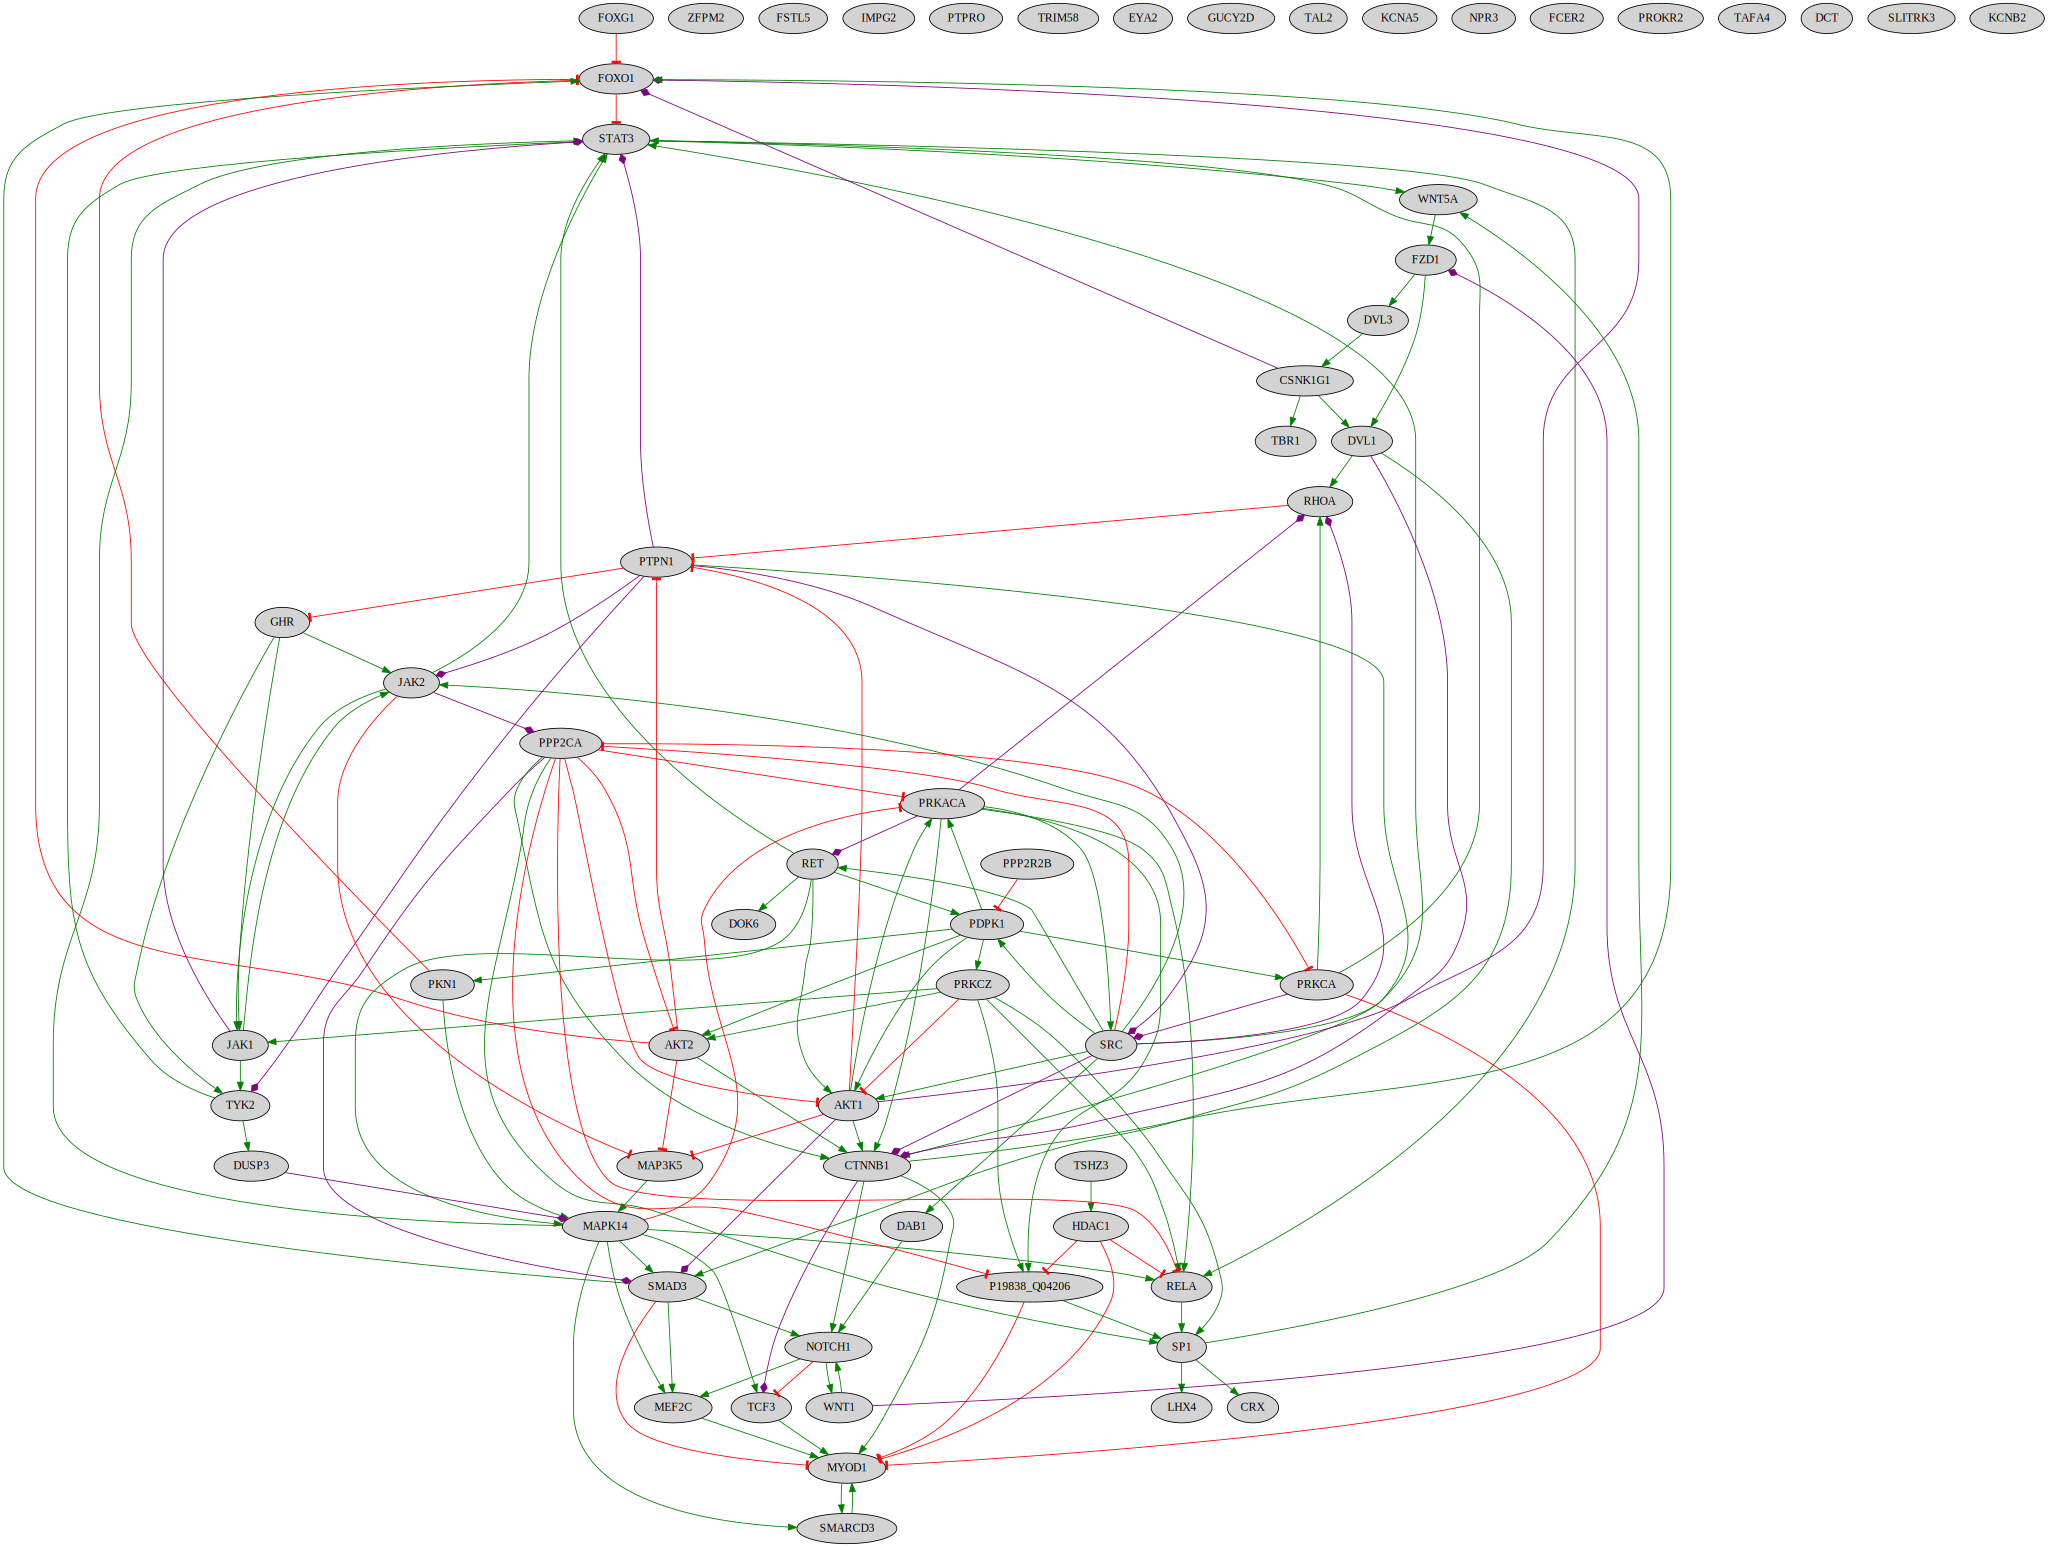

In [13]:
group3_visualizer = NetworkVisualizer(group3_net,color_by='effect')
output = figures_folder + "Group3_all_omnipath"
group3_visualizer.render(output_file=output)

# Exporting Network in sif file

In [18]:
from neko._outputs.exports import Exports

In [19]:
for node in group3_net.nodes["Uniprot"]:
    if group3_net.edges[group3_net.edges["source"].isin([node])].empty and group3_net.edges[group3_net.edges["target"].isin([node])].empty:
        print(group3_net.nodes[group3_net.nodes["Uniprot"] == node])
        group3_net.remove_node(node[0])

In [20]:
export = Exports(group3_net)

In [21]:
export.export_sif(sif_output + "Group3_all_omnipath.sif")